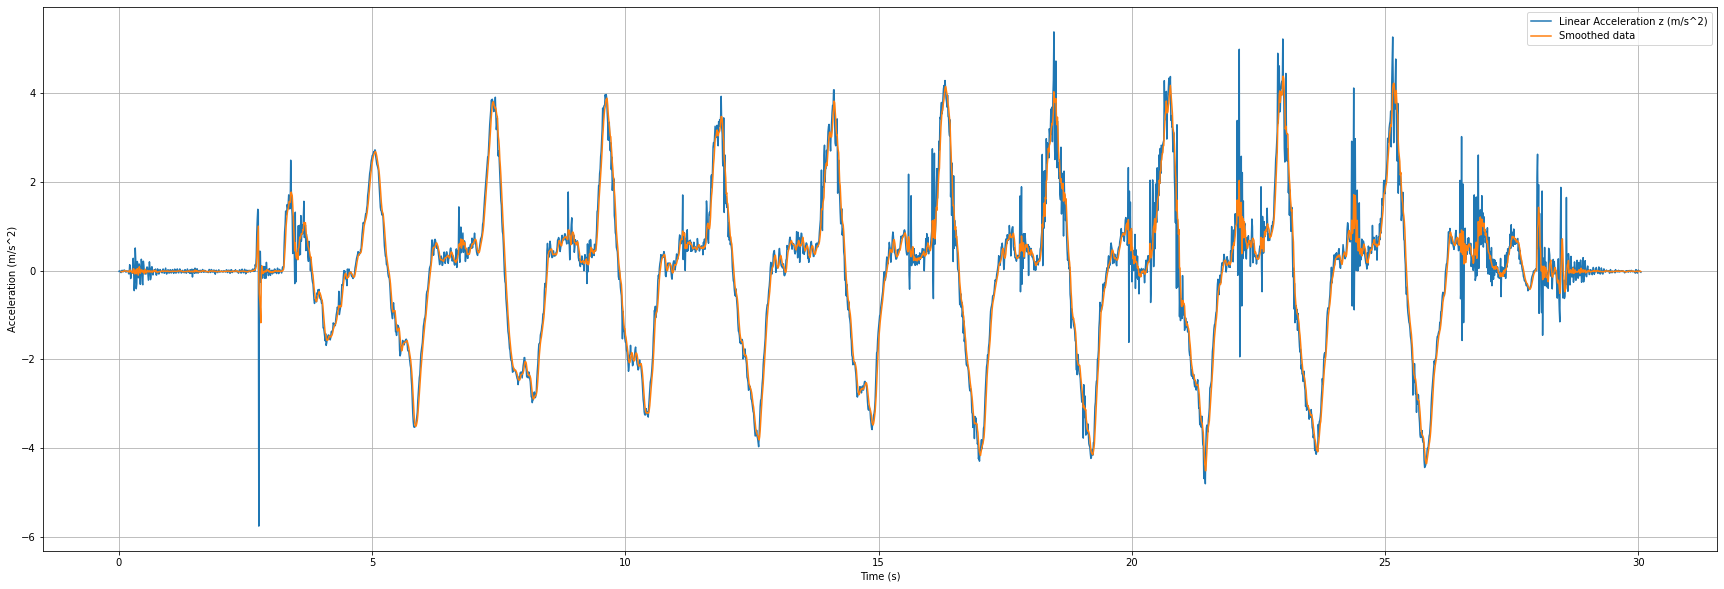

In [12]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv('data/Acceleration without g 2024-03-17 19-47-45/Raw Data.csv')
df['Smoothed Acceleration z (m/s^2)'] = df['Linear Acceleration z (m/s^2)'].rolling(window=5).mean()

plt.figure(figsize=(30,10))
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Linear Acceleration z (m/s^2)')
plt.plot(df['Time (s)'], df['Smoothed Acceleration z (m/s^2)'], label='Smoothed data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid()
plt.show()

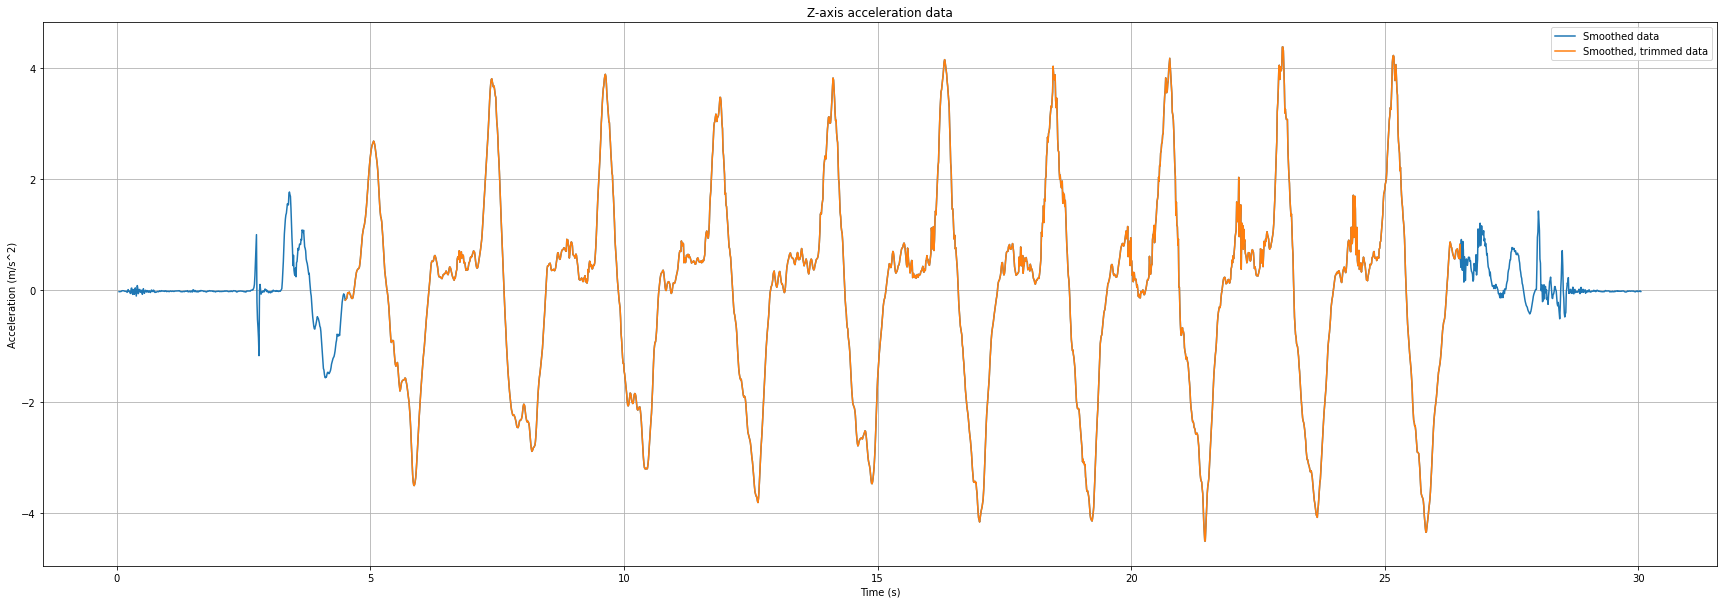

In [13]:
plt.figure(figsize=(30,10))
plt.plot(df['Time (s)'], df['Smoothed Acceleration z (m/s^2)'], label='Smoothed data')

starting_time = 4.5
df = df[df['Time (s)'] >= starting_time]
df = df[df['Time (s)'] <= 26.5]

plt.plot(df['Time (s)'], df['Smoothed Acceleration z (m/s^2)'], label='Smoothed, trimmed data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Z-axis acceleration data')
plt.legend()
plt.grid()

In [14]:
def get_velocity(acceleration: float, V0: float, delta_t: float):
  # a = (V1-V0) / t
  # V1 = a*t + V0
  return acceleration * delta_t + V0

def get_distance(delta_V: float, delta_t: float):
  # V = s/t
  # s = V*t
  return delta_V * delta_t

def get_energy_spent(mass: float, distance: float, acceleration: float):
  # A = F*s
  # F = m*a
  # A = m*a*s
  return mass * (acceleration + 9.81) * distance

def joules_to_kcal(joules: float):
  return joules / 4184

mass = 30
previous_time = starting_time
previous_velocity = 0.0
total_distance = 0.0
total_energy = 0.0
velocity_vec = [[]]
distance_vec = [[]]
energy_vec = [[]]

for index, row in df.iterrows():
  timestep = row["Time (s)"] - previous_time

  velocity = get_velocity(row["Smoothed Acceleration z (m/s^2)"], previous_velocity, timestep)
  velocity_vec.append([row["Time (s)"], velocity])

  distance_step = get_distance(velocity, timestep)
  total_distance += distance_step
  distance_vec.append([row["Time (s)"], total_distance])

  energy_step = get_energy_spent(mass, distance_step, row["Smoothed Acceleration z (m/s^2)"])
  total_energy += abs(energy_step)
  energy_vec.append([row["Time (s)"], total_energy])

  previous_velocity = velocity
  previous_time = row["Time (s)"]

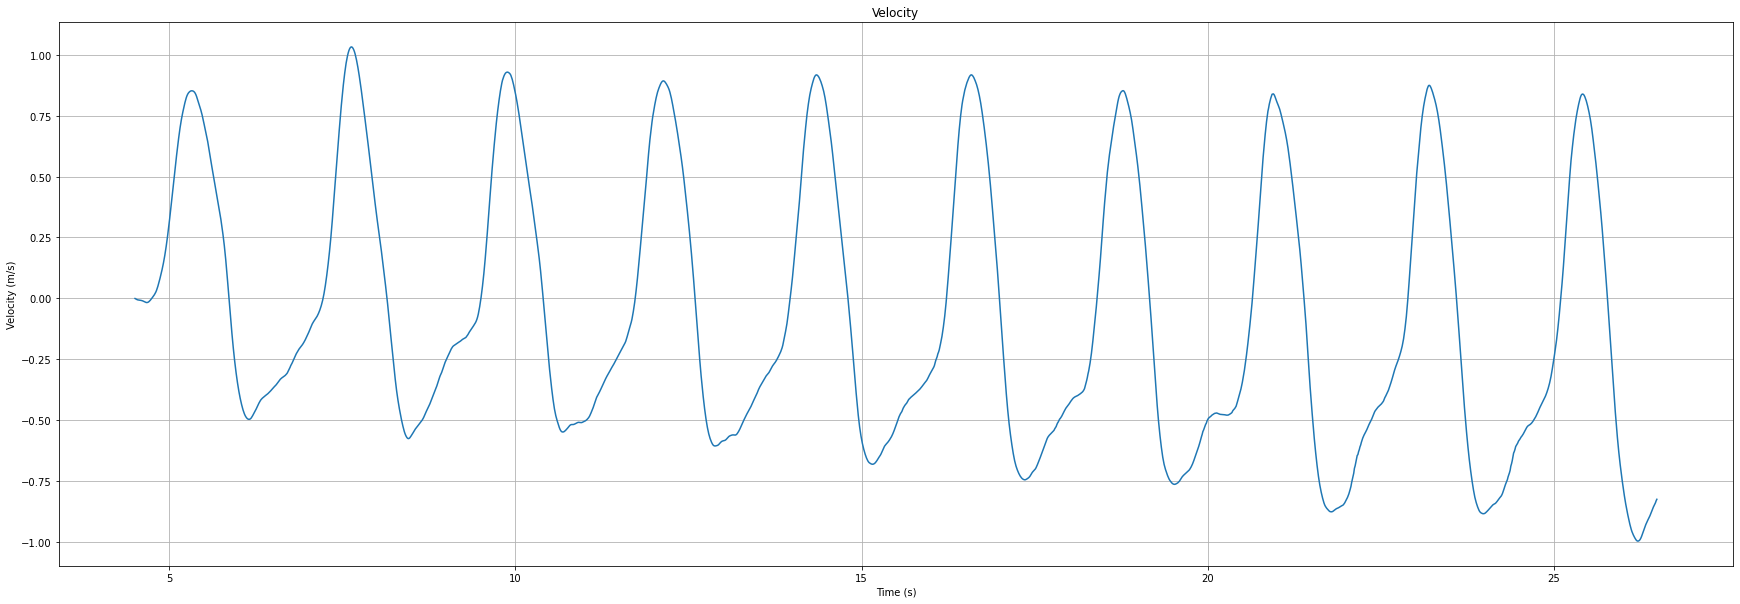

In [22]:
velocity_df = pandas.DataFrame(velocity_vec, columns=['Time (s)', 'Velocity (m/s)'])
plt.figure(figsize=(30,10))
plt.plot(velocity_df['Time (s)'], velocity_df['Velocity (m/s)'], label='Velocity')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity')
plt.grid()
plt.show()

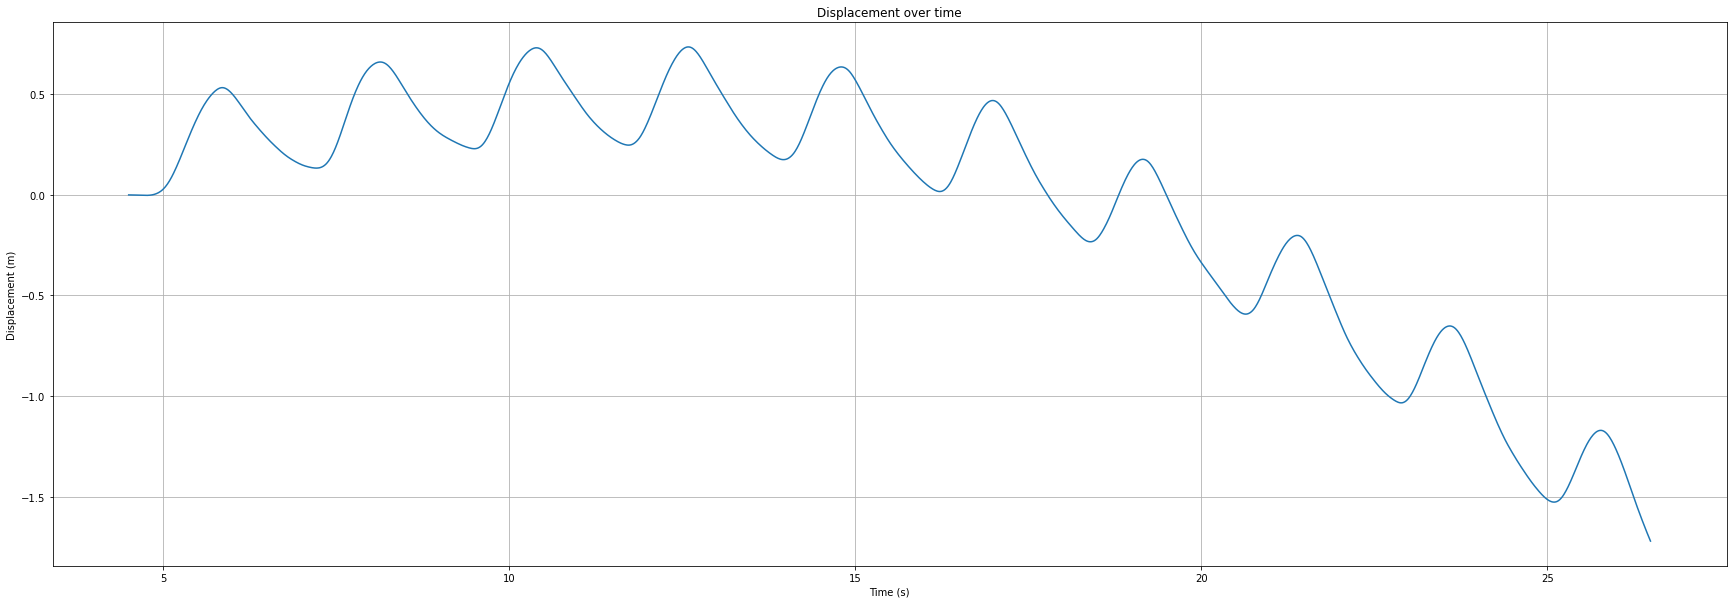

In [26]:
distance_df = pandas.DataFrame(distance_vec, columns=['Time (s)', 'Displacement (m)'])

plt.figure(figsize=(30,10))
plt.plot(distance_df['Time (s)'], distance_df['Displacement (m)'], label='Displacement')

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement over time')
plt.grid()
plt.show()

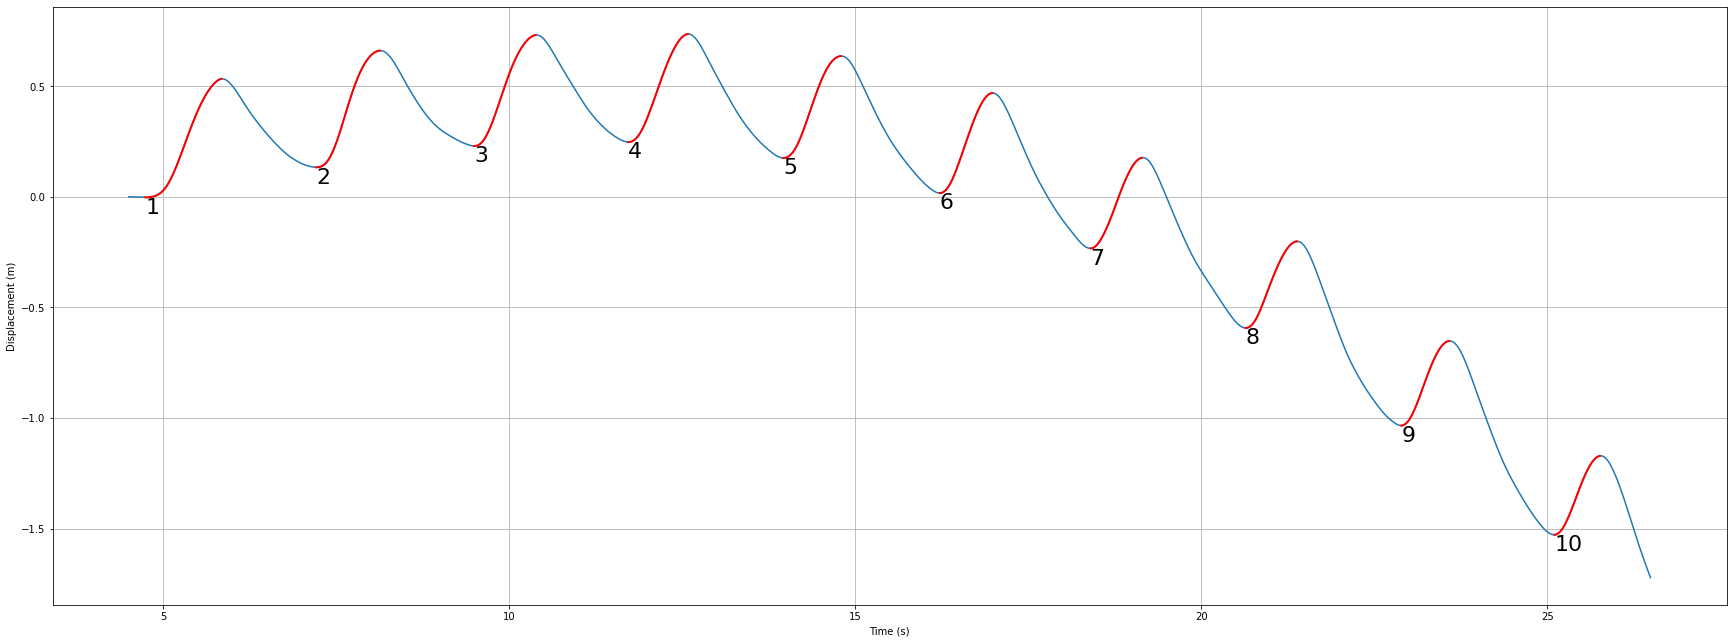

In [37]:
def get_upward_motion_indices(displacement_data):
  start_indices = []
  end_indices = []
  for i in range(1, len(displacement_data) - 1):
    if displacement_data[i-1] < displacement_data[i] and displacement_data[i] >= displacement_data[i+1]:
      end_indices.append(i)
    if displacement_data[i-1] >= displacement_data[i] and displacement_data[i] < displacement_data[i+1]:
      start_indices.append(i)
  return start_indices, end_indices

start_indices, end_indices = get_upward_motion_indices(distance_df['Displacement (m)'].values)

plt.figure(figsize=(30, 11))
plt.plot(distance_df['Time (s)'], distance_df['Displacement (m)'], label='Displacement')

for i in range(len(start_indices)):
  label = f"{i+1}"
  plt.plot(distance_df['Time (s)'][start_indices[i]:end_indices[i]], distance_df['Displacement (m)'][start_indices[i]:end_indices[i]], color="red", linewidth=2)
  plt.text(distance_df['Time (s)'][start_indices[i]], distance_df['Displacement (m)'][start_indices[i]], label, fontsize=22, verticalalignment='top', color='black')

plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid()
plt.show()